In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


In [15]:
df=pd.read_csv('../../vente_car_bi_hatem.csv',delimiter=';')



# 1-Data Understanding

## 1.1 Data info

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364109 entries, 0 to 364108
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ANCSCP  364109 non-null  int64 
 1   NOMCLI  364109 non-null  object
 2   DATLIV  364109 non-null  object
 3   LIBGVR  364109 non-null  object
 4   LIBLOC  364109 non-null  object
 5   LIBPRD  364109 non-null  object
 6   QTEPRD  364106 non-null  object
 7   MNTHT   364106 non-null  object
dtypes: int64(1), object(7)
memory usage: 22.2+ MB


<b>ANCSCP</b>: Client Code  <br>
<b>LIBPRD</b>: type of product that will be delivered <br>
<b>DATLIV</b>: delivery date<br>
<b>LIBGVR</b>: governorate of gas station<br>
<b>LIBLOC</b>: region of gas station<br>
<b>MNTHT</b>: total amount to be paid excluding tax<br>
<b>QTEPRD</b>: total quantity delivered<br>
<b>prixHT</b>: unit price<br>

In [17]:
df['NOMCLI'] = df['NOMCLI'].str.strip()
df['NOMCLI'].unique().size


247

In [18]:
df['NOMCLI'].value_counts()


NOMCLI
TAIEB BEN SMAIL                      6525
STE MOHAMED BEN AMRI "SMBA"          5446
STE SOFIBEL                          4854
HEDI EL HADEF                        4777
AHMED NACHI                          4568
                                     ... 
SOCIETE SAGES RAS JEBEL                 7
STE EL MOSTAKBEL BECHIR AJJABI          5
SOCIETE SAGES  PK29 SUD EL GRIAAT       4
ABDELKADER BEN HASSEN ACHOUR            4
ALI BEN HATTAB BEN HASSINE              2
Name: count, Length: 247, dtype: int64

In [19]:
df['QTEPRD']=df['QTEPRD'].str.replace(',','.')

df['QTEPRD']=pd.to_numeric(df['QTEPRD'],errors='raise')


In [20]:
df['MNTHT']=df['MNTHT'].str.replace(',','.')
df['MNTHT']=pd.to_numeric(df['MNTHT'],errors='coerce')


In [21]:
df['LIBPRD'].value_counts()

LIBPRD
TIMBRE LOI 54 du 19/08/2014    98496
GASOIL                         93122
SSP SUPER SANS PLOMB           81755
GASOIL 50                      40823
Timbre Loi Fin.2018            27790
GAZOIL SANS SOUFRE             15702
PETROLE                         4916
AGILIX PREMIUM ESSENCE           591
APS AGILIX PREMIUM ESS.          498
AGILIX PREMIUM GASOIL            209
APG AGILIX PREMIUM GAS.          207
Name: count, dtype: int64

In [22]:
df.loc[df["LIBPRD"] == "AGILIX PREMIUM ESSENCE", "LIBPRD"] = "APS AGILIX PREMIUM ESS."
df.loc[df["LIBPRD"] == "AGILIX PREMIUM GASOIL", "LIBPRD"] = "APG AGILIX PREMIUM GAS."
valeurs_a_supprimer = ["B.T.S", "PETROLE BUTIMES", "FOL", "WHITE SPIRIT","PETROLE"]



df = df[~df["LIBPRD"].isin(valeurs_a_supprimer)]

In [23]:
df = df.assign(
    prixHT=lambda x: x.apply(
        lambda row: 0 if row['MNTHT'] < 0 or row['QTEPRD'] == 0 else row['MNTHT'] / row['QTEPRD'], 
        axis=1
    )
)

In [24]:
df=df[df['prixHT']>0]

## 1.2 Null Values:

In [25]:
df.isnull().values.any()


False

In [26]:
df=df[df['MNTHT']>0]

In [27]:
df

,ANCSCP,NOMCLI,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,MNTHT,prixHT
1,5452,SADOK BEN SALHA,02/01/2017,NABEUL,MENZEL TEMIME,GASOIL,12.0,11617.500,968.125
4,5452,SADOK BEN SALHA,05/01/2017,NABEUL,MENZEL TEMIME,GASOIL 50,8.0,9732.144,1216.518
7,5452,SADOK BEN SALHA,15/03/2017,NABEUL,MENZEL TEMIME,GASOIL,9.0,8713.125,968.125
8,5452,SADOK BEN SALHA,13/01/2017,NABEUL,MENZEL TEMIME,GASOIL,7.0,6776.875,968.125
9,5452,SADOK BEN SALHA,13/01/2017,NABEUL,MENZEL TEMIME,GASOIL,15.0,14521.875,968.125
...,...,...,...,...,...,...,...,...,...
364101,5364,ANIS KACEM,24/12/2019,BEN AROUS,FOUCHANA,SSP SUPER SANS PLOMB,5.0,8343.695,1668.739
364102,5364,ANIS KACEM,24/12/2019,BEN AROUS,FOUCHANA,GASOIL,11.0,14640.703,1330.973
364104,5364,ANIS KACEM,23/12/2019,BEN AROUS,FOUCHANA,GAZOIL SANS SOUFRE,3.0,4665.132,1555.044
364105,5364,ANIS KACEM,23/12/2019,BEN AROUS,FOUCHANA,SSP SUPER SANS PLOMB,4.0,6674.956,1668.739


## 1.3 Duplicates values


### Remove duplicates


In [28]:

duplicates = df[df.duplicated(keep=False)]
print("Duplicated rows:")
duplicates

Duplicated rows:


,ANCSCP,NOMCLI,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,MNTHT,prixHT
129,5452,SADOK BEN SALHA,17/02/2017,NABEUL,MENZEL TEMIME,GASOIL 50,3.0,3649.554,1216.518
160,5452,SADOK BEN SALHA,17/02/2017,NABEUL,MENZEL TEMIME,GASOIL 50,3.0,3649.554,1216.518
2117,5452,SADOK BEN SALHA,12/01/2019,NABEUL,MENZEL TEMIME,GASOIL,10.0,12553.100,1255.310
2126,5452,SADOK BEN SALHA,12/01/2019,NABEUL,MENZEL TEMIME,GASOIL,10.0,12553.100,1255.310
3411,5538,SABIHA CHOUCHANE,21/03/2017,ARIANA,ARIANA,GASOIL,6.0,5808.750,968.125
...,...,...,...,...,...,...,...,...,...
359770,5356,STE SOFIBEL,14/04/2019,MAHDIA,EL JEM,GAZOIL SANS SOUFRE,4.0,6229.028,1557.257
360149,5356,STE SOFIBEL,08/06/2019,MAHDIA,EL JEM,SSP SUPER SANS PLOMB,4.0,6683.360,1670.840
360211,5356,STE SOFIBEL,08/06/2019,MAHDIA,EL JEM,SSP SUPER SANS PLOMB,4.0,6683.360,1670.840
360636,5356,STE SOFIBEL,09/09/2019,MAHDIA,EL JEM,GASOIL,20.0,26619.460,1330.973


In [29]:
df=df.drop_duplicates()
print("Shape of dataset after removing duplicates:",df.shape)

Shape of dataset after removing duplicates: (232111, 9)


## 1.4 Data Vizualiastion


In [30]:
qt=df.groupby(['LIBGVR']).sum('QTEPRD')



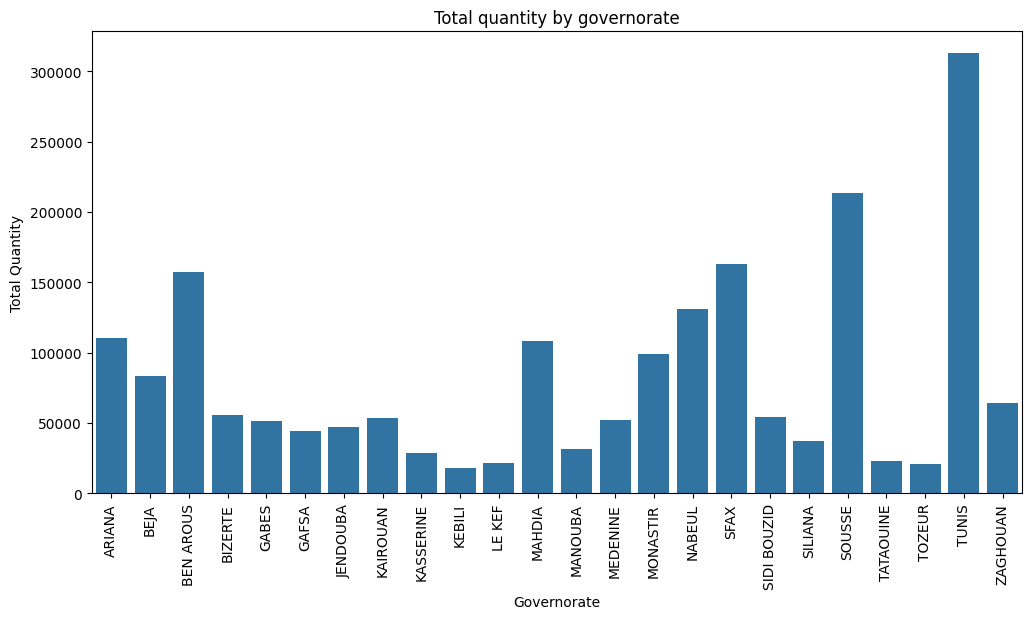

In [31]:
import seaborn as sns
# Visualisation par gouvernorat
plt.figure(figsize=(12, 6))
sns.barplot(x='LIBGVR', y='QTEPRD', data=qt)
plt.title('Total quantity by governorate')
plt.xlabel('Governorate')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

## <i>Interpretation</i>
Tunis consumes more fuel than other governorate and this reflects : <br>
    -the high density population for tunisia's capital <br>
    -the high economic activity<br>



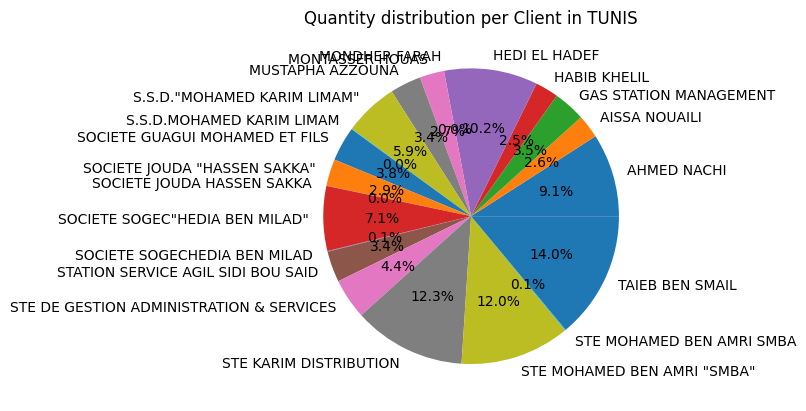

In [32]:
df_tunis = df[df["LIBGVR"] == "TUNIS"]
df_somme_client = df_tunis.groupby(["NOMCLI"])["QTEPRD"].sum()
plt.pie(df_somme_client.values, labels=df_somme_client.index, autopct="%1.1f%%")
plt.title("Quantity distribution per Client in TUNIS")
plt.show()

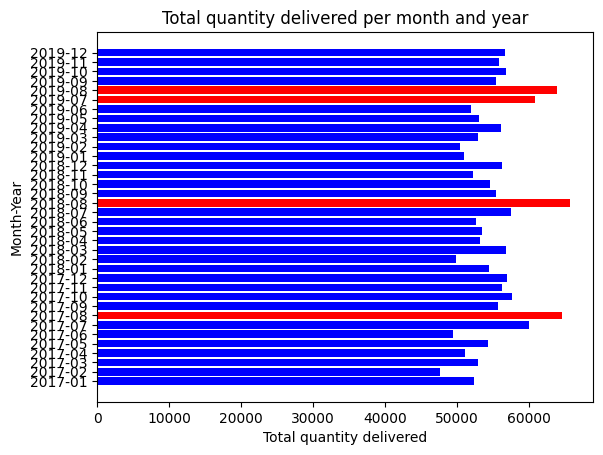

In [33]:
import matplotlib.pyplot as plt

df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')

# Extraire le mois et l'année de DATLIV
df['Month_Year'] = df['DATLIV'].dt.to_period('M')

# Grouper par mois et année et calculer la somme des quantités livrées
df_somme_mensuelle = df.groupby("Month_Year")["QTEPRD"].sum()
colors = ['red' if quantity > 60000 else 'blue' for quantity in df_somme_mensuelle]

# Créer un graphique en barres horizontales
plt.barh(df_somme_mensuelle.index.astype(str), df_somme_mensuelle,color=colors)
plt.xlabel("Total quantity delivered")
plt.ylabel("Month-Year")
plt.title("Total quantity delivered per month and year")
plt.show()

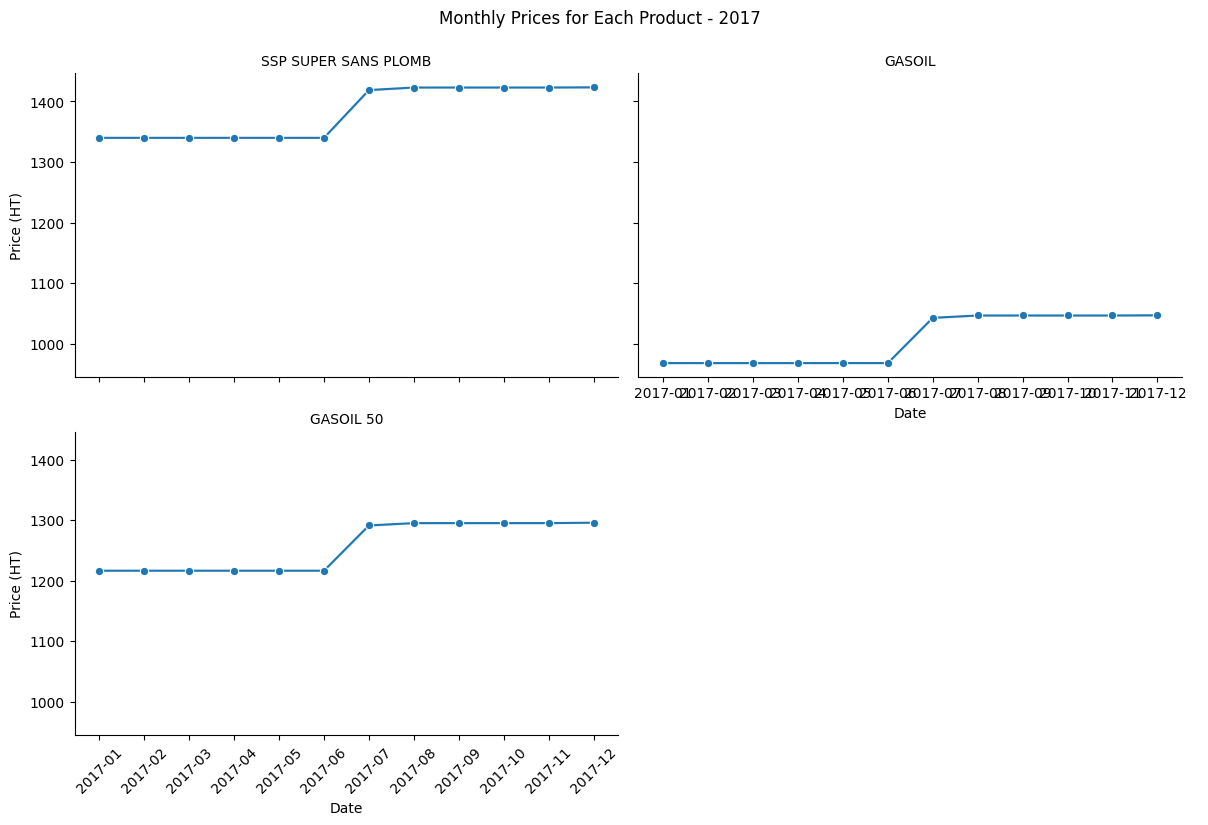

In [34]:
df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')
df['Month_Year'] = df['DATLIV'].dt.to_period('M')
df['Month_Year_Str'] = df['Month_Year'].astype(str)

# Create a boolean mask for dates between 01-2017 and 12-2017
mask = (df['DATLIV'].dt.year >= 2017) & (df['DATLIV'].dt.year <= 2017)

# Filter the dataframe using the mask
df_filtered = df[mask]
df_filtered= df_filtered.sort_values(by="DATLIV")

# Créer le graphique en utilisant seaborn
g = sns.FacetGrid(df_filtered, col="LIBPRD", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "Month_Year_Str", "prixHT", marker='o')
g.set_axis_labels("Date", "Price (HT)")
g.set_titles("{col_name}")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Prices for Each Product - 2017')
plt.xticks(rotation=45)
plt.show()

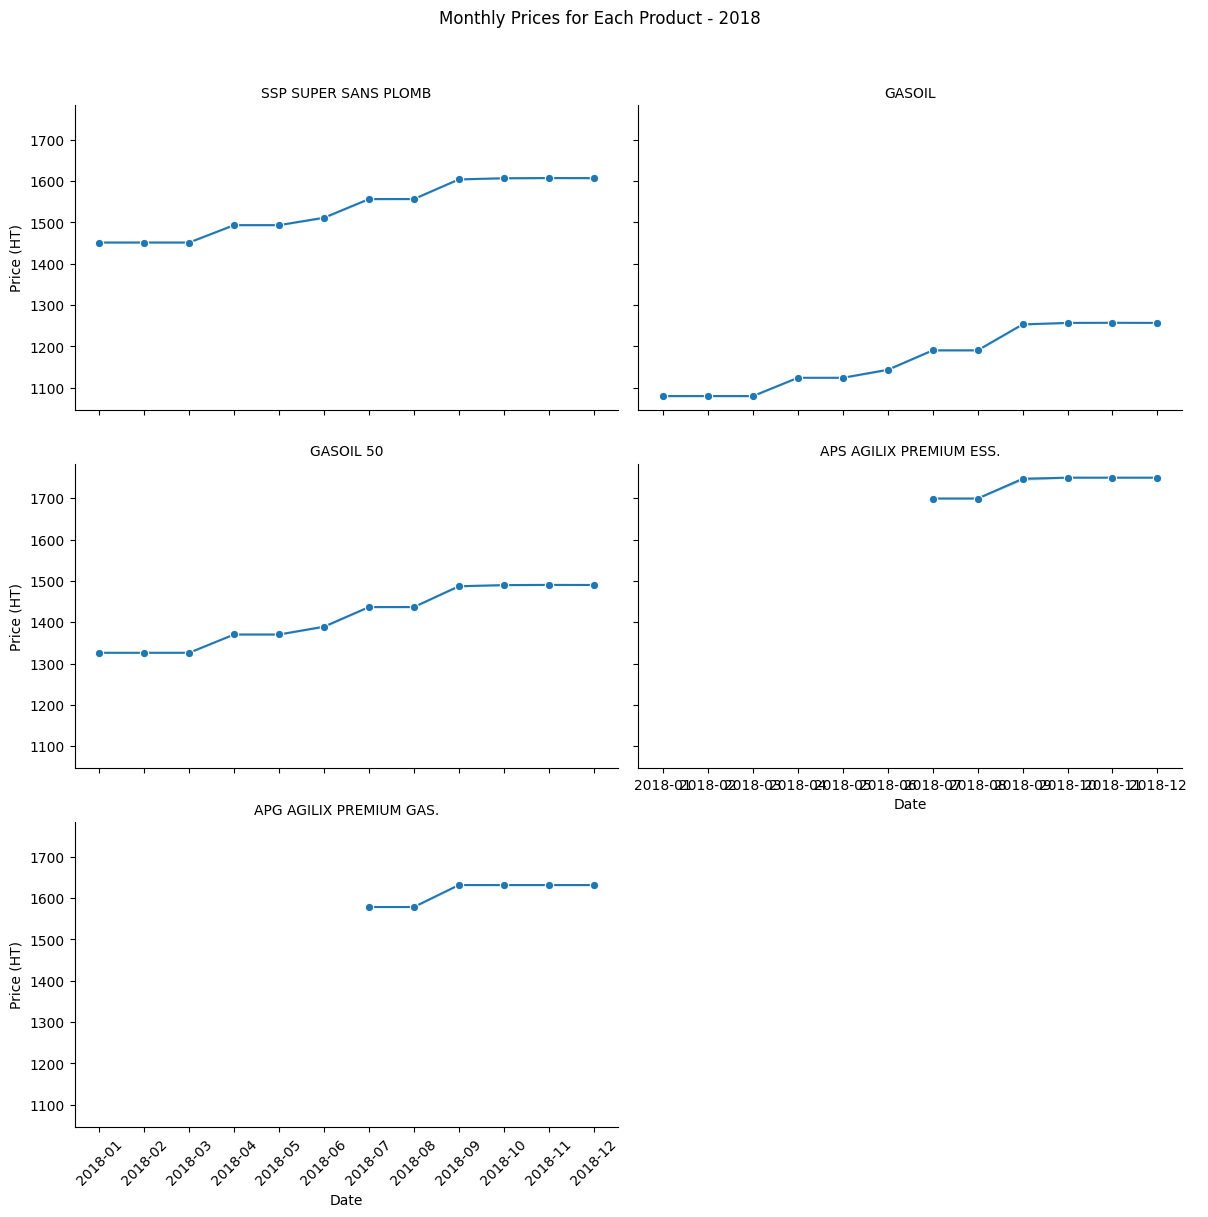

In [35]:
df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')
df['Month_Year'] = df['DATLIV'].dt.to_period('M')
df['Month_Year_Str'] = df['Month_Year'].astype(str)

mask = (df['DATLIV'].dt.year >= 2018) & (df['DATLIV'].dt.year <= 2018)

df_filtered_2018 = df[mask]
df_filtered_2018= df_filtered_2018.sort_values(by="DATLIV")

g = sns.FacetGrid(df_filtered_2018, col="LIBPRD", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "Month_Year_Str", "prixHT", marker='o')
g.set_axis_labels("Date", "Price (HT)")
g.set_titles("{col_name}")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Prices for Each Product - 2018')
plt.xticks(rotation=45)
plt.show()

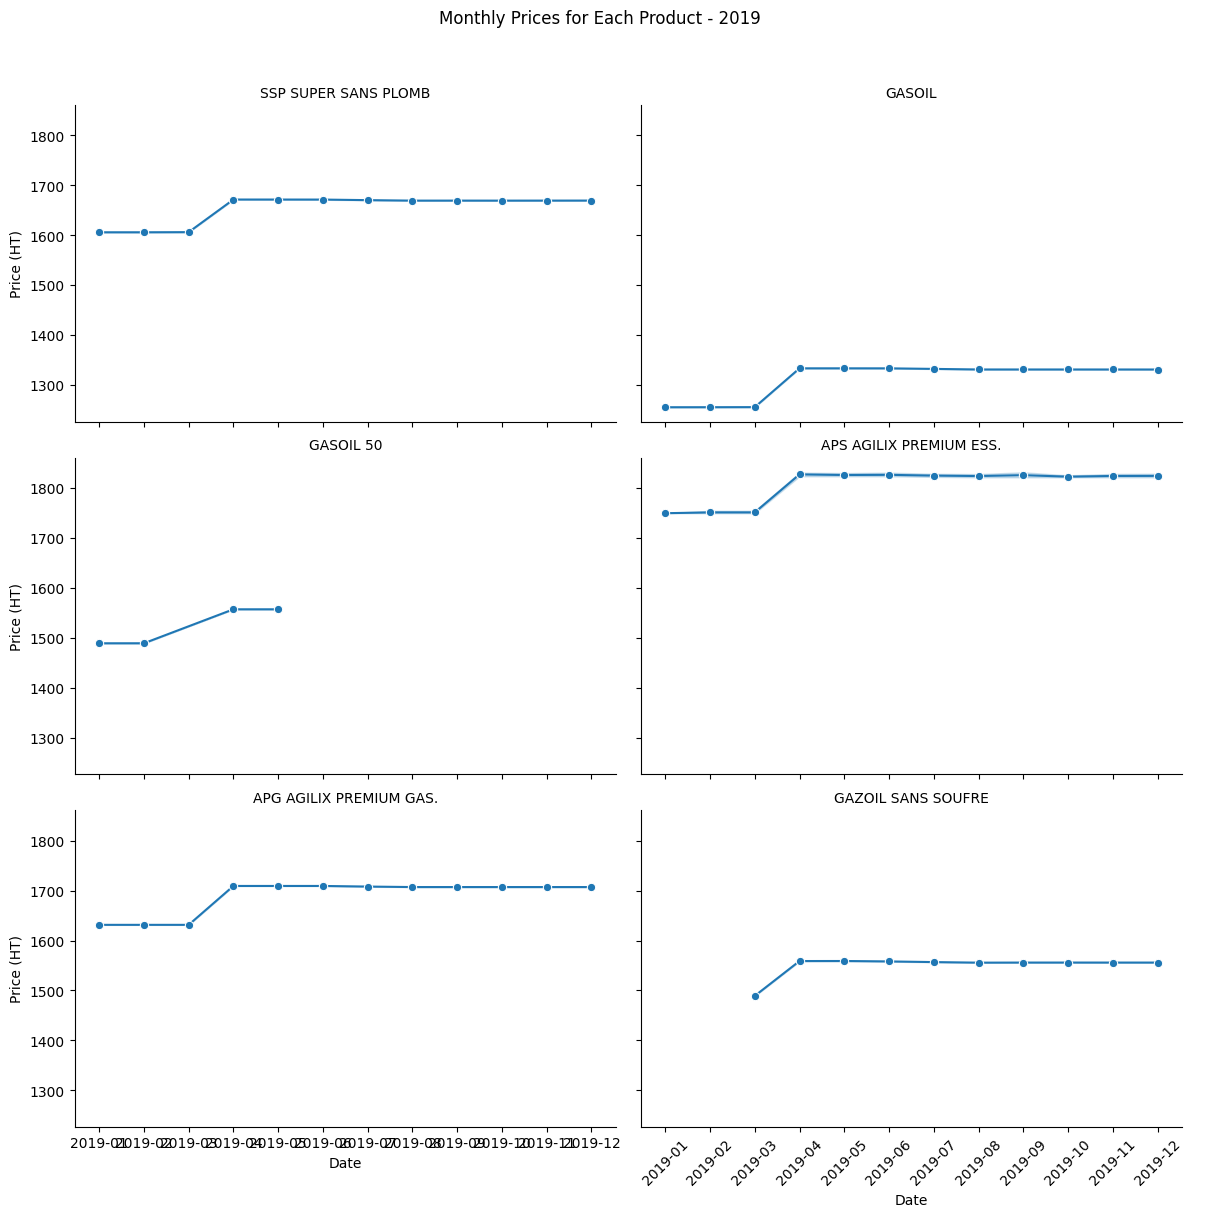

In [36]:
df['DATLIV'] = pd.to_datetime(df['DATLIV'], format='%d/%m/%Y')
df['Month_Year'] = df['DATLIV'].dt.to_period('M')
df['Month_Year_Str'] = df['Month_Year'].astype(str)

mask = (df['DATLIV'].dt.year >= 2019) & (df['DATLIV'].dt.year <= 2019)

df_filtered_2019 = df[mask]
df_filtered_2019= df_filtered_2019.sort_values(by="DATLIV")

g = sns.FacetGrid(df_filtered_2019, col="LIBPRD", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, "Month_Year_Str", "prixHT", marker='o')
g.set_axis_labels("Date", "Price (HT)")
g.set_titles("{col_name}")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Prices for Each Product - 2019')
plt.xticks(rotation=45)
plt.show()

## <i>Interpretation</i>
-There is a notable variation in the quantity of fuel delivered each month and especially for <b>Aug-18 </b>After refering to the 'monthly prices for each product' graph, we can interpret that this spike is  relevant <b>to the increase of fuel price in sept-18</b>
<br>
-There could be times of year when fuel demand increases, perhaps due to holidays or weather changes and this happened especially during summer vacation (July-19,Aug-19,Aug-18)



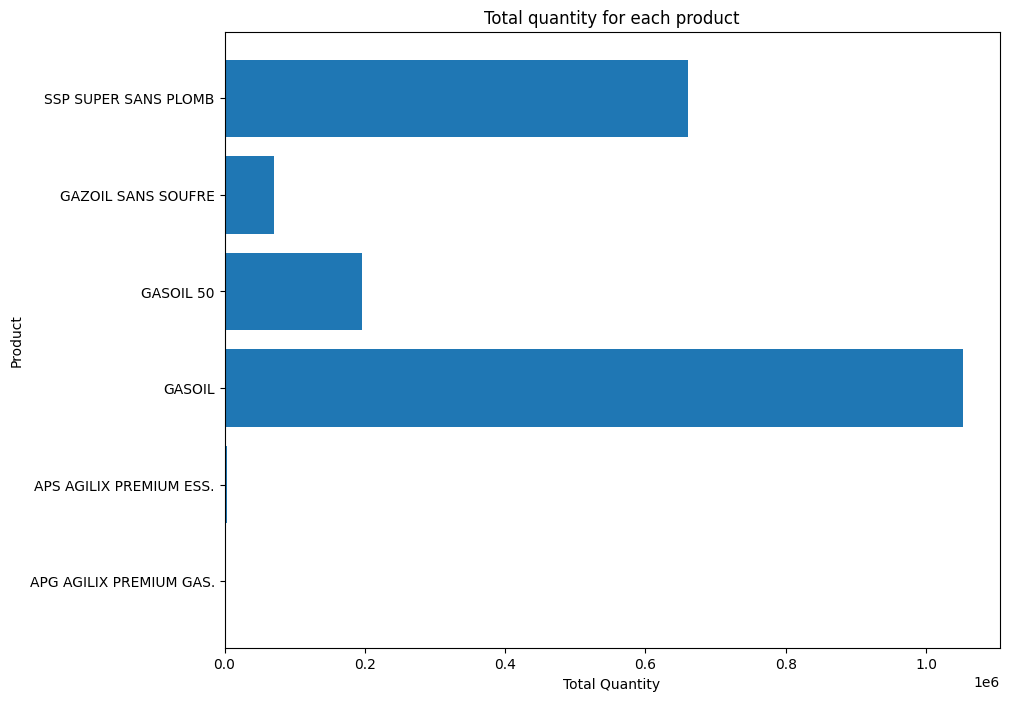

In [37]:
import matplotlib.pyplot as plt

# Calculer la quantité totale de carburant livré pour chaque produit
df_somme_produit = df.groupby(["LIBPRD"])["QTEPRD"].sum()
# Créer un bar plot pour chaque produit

plt.figure(figsize=(10, 8))
plt.barh(df_somme_produit.index, df_somme_produit)
plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.title('Total quantity for each product')
plt.show()

# 2-Data Preparation

### 2.1 Outliers

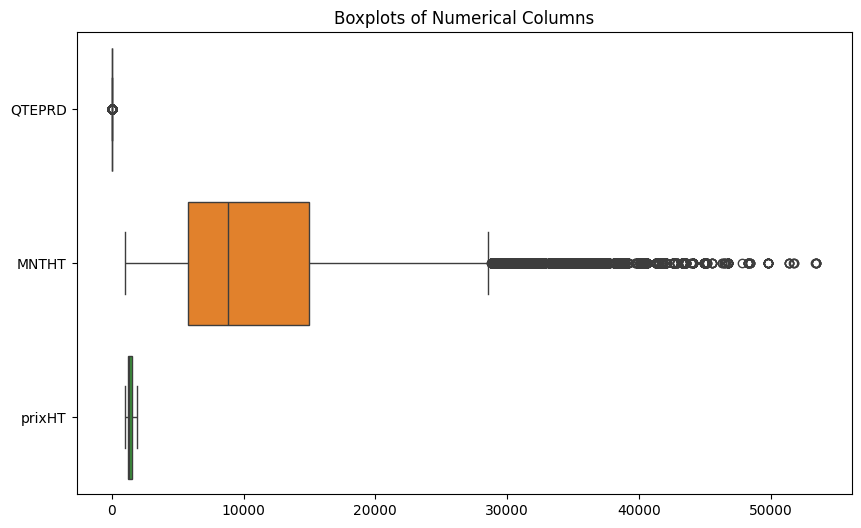

In [38]:
import seaborn as sns


numerical_columns = df.select_dtypes(include=['float64']).columns
# Create a boxplot for all numerical columns on the same graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

### 2.2 Delete MNTHT COLUMN


In [39]:
df=df.drop(columns='MNTHT')
df=df.drop(columns='Month_Year')
df=df.drop(columns='Month_Year_Str')

### 2.3 Extract reference between id and client name  


In [40]:
df_client_reference = df[['ANCSCP', 'NOMCLI']]

# Supprimer les doublons
df_client_reference = df_client_reference.drop_duplicates()
df_client_reference = df_client_reference.drop_duplicates(subset='ANCSCP')

# Sauvegarder en fichier CSV
#df_client_reference.to_csv('../data/BO1_forcast_customer_demand/Client IDs.csv', index=False)

In [41]:
df=df.drop(columns='NOMCLI')


### 2.4 Order data

In [42]:
df = df.sort_values(by=['ANCSCP', 'LIBGVR', 'LIBLOC','LIBPRD','DATLIV'])
df

,ANCSCP,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,prixHT
135399,5030,2018-07-01,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,4.0,1699.244
135976,5030,2018-07-16,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,3.0,1699.244
136048,5030,2018-07-30,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,4.0,1699.244
136561,5030,2018-08-28,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,4.0,1699.244
137744,5030,2018-09-08,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,3.0,1749.664
...,...,...,...,...,...,...,...
105919,5597,2019-11-29,TATAOUINE,TATAOUINE,SSP SUPER SANS PLOMB,7.0,1668.739
105962,5597,2019-12-11,TATAOUINE,TATAOUINE,SSP SUPER SANS PLOMB,2.0,1668.739
105968,5597,2019-12-16,TATAOUINE,TATAOUINE,SSP SUPER SANS PLOMB,4.0,1668.739
105941,5597,2019-12-20,TATAOUINE,TATAOUINE,SSP SUPER SANS PLOMB,3.0,1668.739


In [43]:
df['ANCSCP'].value_counts()

ANCSCP
5479    3933
5450    3324
5356    3223
5399    3123
5513    2937
        ... 
5501      50
5597      32
5069      29
5496       3
5368       1
Name: count, Length: 219, dtype: int64

### 2.5 Add Lagging

In [44]:
df['lag1_previous_order'] = df.groupby(['ANCSCP','LIBPRD','LIBLOC'])['QTEPRD'].shift(1)
df['lag3_previous_order'] = df.groupby(['ANCSCP','LIBPRD','LIBLOC'])['QTEPRD'].shift(2)
df['lag6_previous_order'] = df.groupby(['ANCSCP','LIBPRD','LIBLOC'])['QTEPRD'].shift(3)
df['lag9_previous_order'] = df.groupby(['ANCSCP','LIBPRD','LIBLOC'])['QTEPRD'].shift(4)


In [45]:
df['lag1_previous_order'].fillna(0, inplace=True)
df['lag3_previous_order'].fillna(0, inplace=True)
df['lag6_previous_order'].fillna(0, inplace=True)
df['lag9_previous_order'].fillna(0, inplace=True)
df.head()

,ANCSCP,DATLIV,LIBGVR,LIBLOC,LIBPRD,QTEPRD,prixHT,lag1_previous_order,lag3_previous_order,lag6_previous_order,lag9_previous_order
135399,5030,2018-07-01,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,4.0,1699.244,0.0,0.0,0.0,0.0
135976,5030,2018-07-16,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,3.0,1699.244,4.0,0.0,0.0,0.0
136048,5030,2018-07-30,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,4.0,1699.244,3.0,4.0,0.0,0.0
136561,5030,2018-08-28,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,4.0,1699.244,4.0,3.0,4.0,0.0
137744,5030,2018-09-08,TUNIS,TUNIS VILLE,APS AGILIX PREMIUM ESS.,3.0,1749.664,4.0,4.0,3.0,4.0


### 2.6 Data transformation 

In [46]:
df_transformed=df


In [47]:
categorical_columns = ['LIBPRD','LIBGVR','LIBLOC']
# Appliquer l'encodage one-hot
df_transformed = pd.get_dummies(df_transformed, columns=categorical_columns)
df_transformed

,ANCSCP,DATLIV,QTEPRD,prixHT,lag1_previous_order,lag3_previous_order,lag6_previous_order,lag9_previous_order,LIBPRD_APG AGILIX PREMIUM GAS.,LIBPRD_APS AGILIX PREMIUM ESS.,...,LIBLOC_TATAOUINE,LIBLOC_TEBOULBOU,LIBLOC_THALA,LIBLOC_TOUZA,LIBLOC_TOZEUR,LIBLOC_TOZGRANE,LIBLOC_TUNIS VILLE,LIBLOC_ZAGHOUAN,LIBLOC_ZARZIS,LIBLOC_ZARZOUNA
135399,5030,2018-07-01,4.0,1699.244,0.0,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,True,False,False,False
135976,5030,2018-07-16,3.0,1699.244,4.0,0.0,0.0,0.0,False,True,...,False,False,False,False,False,False,True,False,False,False
136048,5030,2018-07-30,4.0,1699.244,3.0,4.0,0.0,0.0,False,True,...,False,False,False,False,False,False,True,False,False,False
136561,5030,2018-08-28,4.0,1699.244,4.0,3.0,4.0,0.0,False,True,...,False,False,False,False,False,False,True,False,False,False
137744,5030,2018-09-08,3.0,1749.664,4.0,4.0,3.0,4.0,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105919,5597,2019-11-29,7.0,1668.739,5.0,4.0,4.0,8.0,False,False,...,True,False,False,False,False,False,False,False,False,False
105962,5597,2019-12-11,2.0,1668.739,7.0,5.0,4.0,4.0,False,False,...,True,False,False,False,False,False,False,False,False,False
105968,5597,2019-12-16,4.0,1668.739,2.0,7.0,5.0,4.0,False,False,...,True,False,False,False,False,False,False,False,False,False
105941,5597,2019-12-20,3.0,1668.739,4.0,2.0,7.0,5.0,False,False,...,True,False,False,False,False,False,False,False,False,False


In [48]:
df_transformed['DATLIV'] = pd.to_datetime(df_transformed['DATLIV'])
df_transformed['Year'] = df_transformed['DATLIV'].dt.year
df_transformed['Month'] = df_transformed['DATLIV'].dt.month
df_transformed['Day'] = df_transformed['DATLIV'].dt.day
df_transformed['Weekday'] = df_transformed['DATLIV'].dt.weekday
df_transformed['Quarter'] = df_transformed['DATLIV'].dt.quarter
df_transformed['month_sin'] = np.sin(2 * np.pi * df_transformed['Month'] / 12)
df_transformed['month_cos'] = np.cos(2 * np.pi * df_transformed['Month'] / 12)
df_transformed['day_sin'] = np.sin(2 * np.pi * df_transformed['Day'] / 31)
df_transformed['day_cos'] = np.cos(2 * np.pi * df_transformed['Day'] / 31)
df_transformed

,ANCSCP,DATLIV,QTEPRD,prixHT,lag1_previous_order,lag3_previous_order,lag6_previous_order,lag9_previous_order,LIBPRD_APG AGILIX PREMIUM GAS.,LIBPRD_APS AGILIX PREMIUM ESS.,...,LIBLOC_ZARZOUNA,Year,Month,Day,Weekday,Quarter,month_sin,month_cos,day_sin,day_cos
135399,5030,2018-07-01,4.0,1699.244,0.0,0.0,0.0,0.0,False,True,...,False,2018,7,1,6,3,-5.000000e-01,-8.660254e-01,0.201299,0.979530
135976,5030,2018-07-16,3.0,1699.244,4.0,0.0,0.0,0.0,False,True,...,False,2018,7,16,0,3,-5.000000e-01,-8.660254e-01,-0.101168,-0.994869
136048,5030,2018-07-30,4.0,1699.244,3.0,4.0,0.0,0.0,False,True,...,False,2018,7,30,0,3,-5.000000e-01,-8.660254e-01,-0.201299,0.979530
136561,5030,2018-08-28,4.0,1699.244,4.0,3.0,4.0,0.0,False,True,...,False,2018,8,28,1,3,-8.660254e-01,-5.000000e-01,-0.571268,0.820763
137744,5030,2018-09-08,3.0,1749.664,4.0,4.0,3.0,4.0,False,True,...,False,2018,9,8,5,3,-1.000000e+00,-1.836970e-16,0.998717,-0.050649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105919,5597,2019-11-29,7.0,1668.739,5.0,4.0,4.0,8.0,False,False,...,False,2019,11,29,4,4,-5.000000e-01,8.660254e-01,-0.394356,0.918958
105962,5597,2019-12-11,2.0,1668.739,7.0,5.0,4.0,4.0,False,False,...,False,2019,12,11,2,4,-2.449294e-16,1.000000e+00,0.790776,-0.612106
105968,5597,2019-12-16,4.0,1668.739,2.0,7.0,5.0,4.0,False,False,...,False,2019,12,16,0,4,-2.449294e-16,1.000000e+00,-0.101168,-0.994869
105941,5597,2019-12-20,3.0,1668.739,4.0,2.0,7.0,5.0,False,False,...,False,2019,12,20,4,4,-2.449294e-16,1.000000e+00,-0.790776,-0.612106


In [49]:
df_transformed.drop(columns=['DATLIV'], inplace=True)


In [50]:
df_transformed

,ANCSCP,QTEPRD,prixHT,lag1_previous_order,lag3_previous_order,lag6_previous_order,lag9_previous_order,LIBPRD_APG AGILIX PREMIUM GAS.,LIBPRD_APS AGILIX PREMIUM ESS.,LIBPRD_GASOIL,...,LIBLOC_ZARZOUNA,Year,Month,Day,Weekday,Quarter,month_sin,month_cos,day_sin,day_cos
135399,5030,4.0,1699.244,0.0,0.0,0.0,0.0,False,True,False,...,False,2018,7,1,6,3,-5.000000e-01,-8.660254e-01,0.201299,0.979530
135976,5030,3.0,1699.244,4.0,0.0,0.0,0.0,False,True,False,...,False,2018,7,16,0,3,-5.000000e-01,-8.660254e-01,-0.101168,-0.994869
136048,5030,4.0,1699.244,3.0,4.0,0.0,0.0,False,True,False,...,False,2018,7,30,0,3,-5.000000e-01,-8.660254e-01,-0.201299,0.979530
136561,5030,4.0,1699.244,4.0,3.0,4.0,0.0,False,True,False,...,False,2018,8,28,1,3,-8.660254e-01,-5.000000e-01,-0.571268,0.820763
137744,5030,3.0,1749.664,4.0,4.0,3.0,4.0,False,True,False,...,False,2018,9,8,5,3,-1.000000e+00,-1.836970e-16,0.998717,-0.050649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105919,5597,7.0,1668.739,5.0,4.0,4.0,8.0,False,False,False,...,False,2019,11,29,4,4,-5.000000e-01,8.660254e-01,-0.394356,0.918958
105962,5597,2.0,1668.739,7.0,5.0,4.0,4.0,False,False,False,...,False,2019,12,11,2,4,-2.449294e-16,1.000000e+00,0.790776,-0.612106
105968,5597,4.0,1668.739,2.0,7.0,5.0,4.0,False,False,False,...,False,2019,12,16,0,4,-2.449294e-16,1.000000e+00,-0.101168,-0.994869
105941,5597,3.0,1668.739,4.0,2.0,7.0,5.0,False,False,False,...,False,2019,12,20,4,4,-2.449294e-16,1.000000e+00,-0.790776,-0.612106


In [51]:
 
df_transformed[df_transformed.select_dtypes(include='bool').columns] = df_transformed.select_dtypes(include='bool').astype(int)


### 2.7 Feature Scaling

In [52]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
 

numeric_data = df_transformed.select_dtypes(include=['number'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numeric columns
df_scaled = scaler.fit_transform(numeric_data)

# Convert the normalized array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_data.columns)


In [53]:
import joblib
joblib.dump(scaler, '../../deployML/notebooks/scaler.pkl')
print(scaler)

MinMaxScaler()


In [54]:
df_transformed.head()

,ANCSCP,QTEPRD,prixHT,lag1_previous_order,lag3_previous_order,lag6_previous_order,lag9_previous_order,LIBPRD_APG AGILIX PREMIUM GAS.,LIBPRD_APS AGILIX PREMIUM ESS.,LIBPRD_GASOIL,...,LIBLOC_ZARZOUNA,Year,Month,Day,Weekday,Quarter,month_sin,month_cos,day_sin,day_cos
135399,5030,4.0,1699.244,0.0,0.0,0.0,0.0,0,1,0,...,0,2018,7,1,6,3,-0.500000,-8.660254e-01,0.201299,0.979530
135976,5030,3.0,1699.244,4.0,0.0,0.0,0.0,0,1,0,...,0,2018,7,16,0,3,-0.500000,-8.660254e-01,-0.101168,-0.994869
136048,5030,4.0,1699.244,3.0,4.0,0.0,0.0,0,1,0,...,0,2018,7,30,0,3,-0.500000,-8.660254e-01,-0.201299,0.979530
136561,5030,4.0,1699.244,4.0,3.0,4.0,0.0,0,1,0,...,0,2018,8,28,1,3,-0.866025,-5.000000e-01,-0.571268,0.820763
137744,5030,3.0,1749.664,4.0,4.0,3.0,4.0,0,1,0,...,0,2018,9,8,5,3,-1.000000,-1.836970e-16,0.998717,-0.050649


In [55]:
df_inverted=scaler.inverse_transform(df_scaled)
df_inverted=pd.DataFrame(df_inverted,columns=df_scaled.columns)

df_inverted

,ANCSCP,QTEPRD,prixHT,lag1_previous_order,lag3_previous_order,lag6_previous_order,lag9_previous_order,LIBPRD_APG AGILIX PREMIUM GAS.,LIBPRD_APS AGILIX PREMIUM ESS.,LIBPRD_GASOIL,...,LIBLOC_ZARZOUNA,Year,Month,Day,Weekday,Quarter,month_sin,month_cos,day_sin,day_cos
0,5030.0,4.0,1699.244,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2018.0,7.0,1.0,6.0,3.0,-5.000000e-01,-8.660254e-01,0.201299,0.979530
1,5030.0,3.0,1699.244,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2018.0,7.0,16.0,0.0,3.0,-5.000000e-01,-8.660254e-01,-0.101168,-0.994869
2,5030.0,4.0,1699.244,3.0,4.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2018.0,7.0,30.0,0.0,3.0,-5.000000e-01,-8.660254e-01,-0.201299,0.979530
3,5030.0,4.0,1699.244,4.0,3.0,4.0,0.0,0.0,1.0,0.0,...,0.0,2018.0,8.0,28.0,1.0,3.0,-8.660254e-01,-5.000000e-01,-0.571268,0.820763
4,5030.0,3.0,1749.664,4.0,4.0,3.0,4.0,0.0,1.0,0.0,...,0.0,2018.0,9.0,8.0,5.0,3.0,-1.000000e+00,-2.220446e-16,0.998717,-0.050649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232106,5597.0,7.0,1668.739,5.0,4.0,4.0,8.0,0.0,0.0,0.0,...,0.0,2019.0,11.0,29.0,4.0,4.0,-5.000000e-01,8.660254e-01,-0.394356,0.918958
232107,5597.0,2.0,1668.739,7.0,5.0,4.0,4.0,0.0,0.0,0.0,...,0.0,2019.0,12.0,11.0,2.0,4.0,-2.220446e-16,1.000000e+00,0.790776,-0.612106
232108,5597.0,4.0,1668.739,2.0,7.0,5.0,4.0,0.0,0.0,0.0,...,0.0,2019.0,12.0,16.0,0.0,4.0,-2.220446e-16,1.000000e+00,-0.101168,-0.994869
232109,5597.0,3.0,1668.739,4.0,2.0,7.0,5.0,0.0,0.0,0.0,...,0.0,2019.0,12.0,20.0,4.0,4.0,-2.220446e-16,1.000000e+00,-0.790776,-0.612106


### 2.8 PCA 

In [56]:
X=df_scaled.drop(columns='QTEPRD')
Y=df_scaled['QTEPRD']


In [57]:
from  sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=0.70)  
principal_components = pca.fit_transform(X)

# Resulting principal components
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {principal_components.shape[1]}")

Original number of features: 229
Reduced number of features: 22


In [58]:
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])], index=X.columns)

loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
ANCSCP,0.003701,-0.004633,-0.021587,-0.000634,0.000280,-0.024190,0.003330,-0.068470,-0.003147,-0.105676,...,-0.045226,0.285770,-0.323507,0.216490,-0.412596,0.003670,-0.234464,-0.013367,-0.025863,0.073508
prixHT,-0.290720,-0.056029,-0.067734,0.160544,0.145986,0.027222,0.002825,-0.007471,-0.005101,0.012197,...,0.087678,-0.029387,0.040679,-0.030502,-0.027929,-0.003565,0.005997,-0.006993,0.007427,0.008970
lag1_previous_order,0.098067,-0.022236,-0.152980,-0.074718,-0.069300,0.077136,-0.002482,-0.028120,-0.004826,0.036033,...,0.247175,0.029748,0.019648,0.004374,0.116873,0.013014,0.204712,-0.092959,0.042664,0.136322
lag3_previous_order,0.097721,-0.023495,-0.153424,-0.073183,-0.069520,0.077566,-0.003897,-0.028212,-0.007222,0.036343,...,0.249089,0.028230,0.021446,0.002917,0.115566,0.013065,0.204096,-0.093615,0.042832,0.137073
lag6_previous_order,0.097422,-0.024877,-0.153950,-0.071906,-0.069650,0.078052,-0.005789,-0.028435,-0.008470,0.036726,...,0.251461,0.026720,0.023224,0.001592,0.114741,0.013291,0.204464,-0.094593,0.043239,0.138340


In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Convertir les colonnes 'DATLIV' en type datetime
df['DATLIV'] = pd.to_datetime(df['DATLIV'])

# Appliquer l'ANOVA pour chaque variable catégorielle
categorical_vars = ['LIBGVR', 'LIBLOC', 'LIBPRD','DATLIV','prixHT','ANCSCP']
for var in categorical_vars:
    model = ols(f'QTEPRD ~ C({var})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA pour {var}')
    print(anova_table)
    print('\n')

ANOVA pour LIBGVR
                 sum_sq        df           F  PR(>F)
C(LIBGVR)  6.497401e+05      23.0  860.080016     0.0
Residual   7.622962e+06  232087.0         NaN     NaN


ANOVA pour LIBLOC
                 sum_sq        df           F  PR(>F)
C(LIBLOC)  1.401467e+06     183.0  258.492771     0.0
Residual   6.871235e+06  231927.0         NaN     NaN


ANOVA pour LIBPRD
                 sum_sq        df             F  PR(>F)
C(LIBPRD)  1.606361e+06       5.0  11185.875315     0.0
Residual   6.666342e+06  232105.0           NaN     NaN


ANOVA pour DATLIV
                 sum_sq        df         F         PR(>F)
C(DATLIV)  8.849197e+04    1089.0  2.293774  2.661259e-111
Residual   8.184210e+06  231021.0       NaN            NaN


ANOVA pour prixHT
                 sum_sq        df           F  PR(>F)
C(prixHT)  1.812317e+06     152.0  428.096443     0.0
Residual   6.460385e+06  231958.0         NaN     NaN


ANOVA pour ANCSCP
                 sum_sq        df           F  PR(>

### <i> Interpretation </i><br>
All the features have a p value <0.05 so we can say that these features are dependant with the target variable 


# 3- Modeling



### 3.1 XGboost      

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.utils import shuffle


#### 3.1.1 Shuffle Data

In [61]:
from sklearn.utils import shuffle

# Shuffle both DataFrames with the same random state
df_scaled_shuffled, df_inverted_shuffled = shuffle(df_scaled, df_inverted, random_state=42)

#### 3.1.2 Split data

In [62]:

x = df_scaled_shuffled.drop(columns=['QTEPRD'])
y = df_scaled_shuffled['QTEPRD']


In [63]:
X_inverted = df_inverted_shuffled.drop(columns=['QTEPRD'])
Y_inverted= df_inverted_shuffled['QTEPRD']


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [65]:
X_inverted_train, X_inverted_test, Y_inverted_train, Y_inverted_test = train_test_split(X_inverted, Y_inverted, test_size=0.2, random_state=42)


In [66]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10, random_state=42)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [67]:
y_pred_train= model.predict(x_train)
y_pred_train = pd.Series(y_pred_train, name='QTEPRD')
y_pred_train.index = x_train.index


In [68]:
df_target=pd.concat([y_train,y_pred_train,Y_inverted_train],axis=1)
df_target.columns=['y_train','y_pred_train','Y_inverted_train']
df_target.head()

,y_train,y_pred_train,Y_inverted_train
189448,0.09375,0.080786,4.0
226022,0.78125,0.634528,26.0
176578,0.09375,0.190616,4.0
112182,0.15625,0.141167,6.0
202372,0.31250,0.402014,11.0


In [69]:
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.08937741867574815


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_model_train=r2_score(y_train, y_pred_train)
r2_model_train

0.7709667866063791

#### Predict test set


In [71]:
y_pred = model.predict(x_test)
y_pred = pd.Series(y_pred, name='SUM(QTEPRD)')
y_pred.index = x_test.index


In [72]:
df_target_test=pd.concat([y_test,y_pred,Y_inverted_test],axis=1)
df_target_test.columns=['y_test','y_pred_test','Y_inverted_test']
df_target_test.head()

,y_test,y_pred_test,Y_inverted_test
189709,0.18750,0.153521,7.0
141284,0.53125,0.379974,18.0
143249,0.06250,0.082930,3.0
46445,0.28125,0.148913,10.0
69285,0.15625,0.217085,6.0


In [73]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.10508605390426401


In [74]:
r2_model_test = r2_score(y_test, y_pred)
r2_model_test

0.6800513581344239

### 3.2 XGboost with best params

In [75]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
# grid_search.fit(x_train, y_train)

# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 1000}


In [76]:
# best_model = XGBRegressor(objective ='reg:squarederror', 
#                               n_estimators=best_params['n_estimators'], 
#                               learning_rate=best_params['learning_rate'], 
#                               max_depth=best_params['max_depth'], 
#                               min_child_weight=best_params['min_child_weight'])

# best_model.fit(x_train, y_train)



#### predict test set with best params

In [77]:
# y_pred_best = best_model.predict(x_test)
# mse_best = mean_squared_error(y_test, y_pred_best)
# print(f"Mean Squared Error with best parameters: {mse_best}")

In [78]:
# r2_model_test_best = r2_score(y_test, y_pred_best)
# r2_model_test_best

In [79]:
# n = 500
# y_test_1000 = y_test[:n]
# y_pred_1000 = y_pred[:n]

# # Tracé des valeurs réelles et prédites pour les 1000 premiers index
# plt.figure(figsize=(12, 8))

# plt.plot(y_test_1000.values, label='Actual Values', alpha=0.7, linestyle='-', marker='o')
# plt.plot(y_pred_1000, label=f'XGBoost Model Predictions (RMSE: {mse:.5f},R²: {r2_model_test:.5f})', alpha=0.7, linestyle='-', marker='x')

# plt.xlabel('Index')
# plt.ylabel('SUM(QTEPRD)')
# plt.title('Actual vs Predicted Values for First 500 Indexes')
# plt.legend()

# # Afficher le graphique
# plt.show()
     

### plot with time 

In [80]:
df_target_test['y_pred_inverted'] = (df_target_test['y_pred_test'] * df_target_test['Y_inverted_test']) / df_target_test['y_test']
df_target_test.head()


,y_test,y_pred_test,Y_inverted_test,y_pred_inverted
189709,0.18750,0.153521,7.0,5.731446
141284,0.53125,0.379974,18.0,12.874407
143249,0.06250,0.082930,3.0,3.980630
46445,0.28125,0.148913,10.0,5.294669
69285,0.15625,0.217085,6.0,8.336061


In [81]:
df_combined = pd.concat([X_inverted_test, df_target_test], axis=1)
df_combined['Date'] = df_combined['Year'].astype(str) + '-' + df_combined['Month'].astype(str).str.zfill(2) + '-' + df_combined['Day'].astype(str).str.zfill(2)

# Alternatively, use the to_datetime() method
df_combined['Date'] = pd.to_datetime(df_combined[['Year', 'Month', 'Day']])
df_combined

,ANCSCP,prixHT,lag1_previous_order,lag3_previous_order,lag6_previous_order,lag9_previous_order,LIBPRD_APG AGILIX PREMIUM GAS.,LIBPRD_APS AGILIX PREMIUM ESS.,LIBPRD_GASOIL,LIBPRD_GASOIL 50,...,Quarter,month_sin,month_cos,day_sin,day_cos,y_test,y_pred_test,Y_inverted_test,y_pred_inverted,Date
189709,5536.0,1605.294,7.0,2.0,4.0,7.0,0.0,0.0,0.0,0.0,...,4.0,-2.220446e-16,1.000000,-2.217596e-16,1.000000,0.18750,0.153521,7.0,5.731446,2018-12-31
141284,5474.0,1190.531,14.0,16.0,14.0,14.0,0.0,0.0,1.0,0.0,...,3.0,-5.000000e-01,-0.866025,6.513725e-01,-0.758758,0.53125,0.379974,18.0,12.874407,2018-07-12
143249,5479.0,1821.512,3.0,4.0,4.0,4.0,0.0,1.0,0.0,0.0,...,4.0,-8.660254e-01,0.500000,-3.943559e-01,0.918958,0.06250,0.082930,3.0,3.980630,2019-10-29
46445,5300.0,1046.696,6.0,2.0,5.0,7.0,0.0,0.0,1.0,0.0,...,3.0,-5.000000e-01,-0.866025,7.907757e-01,-0.612106,0.28125,0.148913,10.0,5.294669,2017-07-11
69285,5348.0,1079.911,10.0,7.0,6.0,7.0,0.0,0.0,1.0,0.0,...,1.0,8.660254e-01,0.500000,-6.513725e-01,-0.758758,0.15625,0.217085,6.0,8.336061,2018-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172803,5513.0,1555.044,5.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,...,3.0,-5.000000e-01,-0.866025,-4.853020e-01,-0.874347,0.09375,0.108723,4.0,4.638855,2019-07-18
62241,5335.0,1190.531,6.0,9.0,9.0,7.0,0.0,0.0,1.0,0.0,...,3.0,-8.660254e-01,-0.500000,-2.217596e-16,1.000000,0.43750,0.234437,15.0,8.037830,2018-08-31
82049,5367.0,1422.966,2.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,...,4.0,-5.000000e-01,0.866025,9.377521e-01,0.347305,0.03125,0.056704,2.0,3.629066,2017-11-06
130054,5456.0,968.125,12.0,4.0,5.0,11.0,0.0,0.0,1.0,0.0,...,2.0,8.660254e-01,-0.500000,8.978045e-01,-0.440394,0.12500,0.209783,5.0,8.391315,2017-04-10


In [82]:
df_combined['ANCSCP'].value_counts() 

ANCSCP
5479.0    789
5356.0    663
5450.0    650
5399.0    599
5513.0    589
         ... 
5501.0     13
5587.0     11
5597.0     10
5069.0      6
5496.0      1
Name: count, Length: 218, dtype: int64

In [83]:
import plotly.express as px
import plotly.graph_objects as go



df_STE_DE_GESTION = df_combined[df_combined['ANCSCP'] == 5513.0]




In [84]:
df_2017 = df_STE_DE_GESTION[df_STE_DE_GESTION['Date'].dt.year == 2019]


In [85]:
fig = px.line()
fig = go.Figure(fig)
df_2017 = df_2017.sort_values(by="Date")


fig.add_trace(go.Scatter(x=df_2017['Date'], y=df_2017['y_pred_inverted'], 
                         mode='lines', name='prediction of Client SMBA 5450 in 2017', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df_2017['Date'], y=df_2017['Y_inverted_test'], 
                         mode='lines', name='test of SMBA 5450 in 2017', line=dict(color='blue')))
fig.show()

### 3.2 LightGBM


In [86]:
from lightgbm import LGBMRegressor

In [87]:
model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=42)
model_lgbm.fit(x_train, y_train)
y_pred_lgbm = model_lgbm.predict(x_test)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 185688, number of used features: 225
[LightGBM] [Info] Start training from score 0.235885


In [88]:
from joblib import load
model_loaded=load('./../../deployML/notebooks/model_lgbm.joblib')
y_pred_loaded=model_loaded.predict(x_test)

In [89]:
from joblib import dump
dump(model_lgbm,'../../deployML/notebooks/model_lgbm.joblib')


['../../deployML/notebooks/model_lgbm.joblib']

In [90]:
# Evaluate the model
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
print(f"RMSE: {rmse_lgbm}")

RMSE: 0.10246062882489643


In [91]:
mae_model3 = mean_absolute_error(y_test, y_pred_lgbm)
r2_model3 = r2_score(y_test, y_pred_lgbm)
r2_model3

0.6958385733207818

In [92]:
y_pred_lgbm = pd.Series(y_pred_lgbm, name='SUM(QTEPRD)')
y_pred_lgbm.index = x_test.index
y_pred_loaded= pd.Series(y_pred_loaded, name='SUM(QTEPRD)')
y_pred_loaded.index = x_test.index


In [93]:
x_test.head()

,ANCSCP,prixHT,lag1_previous_order,lag3_previous_order,lag6_previous_order,lag9_previous_order,LIBPRD_APG AGILIX PREMIUM GAS.,LIBPRD_APS AGILIX PREMIUM ESS.,LIBPRD_GASOIL,LIBPRD_GASOIL 50,...,LIBLOC_ZARZOUNA,Year,Month,Day,Weekday,Quarter,month_sin,month_cos,day_sin,day_cos
189709,0.892416,0.681572,0.212121,0.060606,0.121212,0.212121,0.0,0.0,0.0,0.0,...,0.0,0.5,1.000000,1.000000,0.000000,1.000000,0.500000,1.000000,0.500000,1.000000
141284,0.783069,0.239293,0.424242,0.484848,0.424242,0.424242,0.0,0.0,1.0,0.0,...,0.0,0.5,0.545455,0.366667,0.500000,0.666667,0.250000,0.066987,0.826105,0.118359
143249,0.791887,0.912134,0.090909,0.121212,0.121212,0.121212,0.0,1.0,0.0,0.0,...,0.0,1.0,0.818182,0.933333,0.166667,1.000000,0.066987,0.750000,0.302569,0.959375
46445,0.476190,0.085916,0.181818,0.060606,0.151515,0.212121,0.0,0.0,1.0,0.0,...,0.0,0.0,0.545455,0.333333,0.166667,0.666667,0.250000,0.066987,0.895896,0.191874
69285,0.560847,0.121335,0.303030,0.212121,0.181818,0.212121,0.0,0.0,1.0,0.0,...,0.0,0.5,0.090909,0.600000,0.000000,0.000000,0.933013,0.750000,0.173895,0.118359


In [94]:
df_target_test_lgbm=pd.concat([y_test,y_pred_lgbm,Y_inverted_test,y_pred_loaded],axis=1)
df_target_test_lgbm.columns=['y_test','y_pred_lgbm','Y_inverted_test','y_pred_loaded']
df_target_test_lgbm.head()

,y_test,y_pred_lgbm,Y_inverted_test,y_pred_loaded
189709,0.18750,0.151056,7.0,0.151056
141284,0.53125,0.392094,18.0,0.392094
143249,0.06250,0.090761,3.0,0.090761
46445,0.28125,0.154211,10.0,0.154211
69285,0.15625,0.183229,6.0,0.183229


In [95]:
df_target_test_lgbm['y_pred_lgbm_inverted'] = (df_target_test_lgbm['y_pred_lgbm'] * df_target_test_lgbm['Y_inverted_test']) / df_target_test_lgbm['y_test']
df_target_test_lgbm.head()


,y_test,y_pred_lgbm,Y_inverted_test,y_pred_loaded,y_pred_lgbm_inverted
189709,0.18750,0.151056,7.0,0.151056,5.639408
141284,0.53125,0.392094,18.0,0.392094,13.285075
143249,0.06250,0.090761,3.0,0.090761,4.356551
46445,0.28125,0.154211,10.0,0.154211,5.483057
69285,0.15625,0.183229,6.0,0.183229,7.035991


In [96]:
df_combined_lgbm = pd.concat([X_inverted_test, df_target_test_lgbm], axis=1)
df_combined_lgbm['Date'] = df_combined_lgbm['Year'].astype(str) + '-' + df_combined_lgbm['Month'].astype(str).str.zfill(2) + '-' + df_combined_lgbm['Day'].astype(str).str.zfill(2)

# Alternatively, use the to_datetime() method
df_combined_lgbm['Date'] = pd.to_datetime(df_combined_lgbm[['Year', 'Month', 'Day']])
df_combined_lgbm

,ANCSCP,prixHT,lag1_previous_order,lag3_previous_order,lag6_previous_order,lag9_previous_order,LIBPRD_APG AGILIX PREMIUM GAS.,LIBPRD_APS AGILIX PREMIUM ESS.,LIBPRD_GASOIL,LIBPRD_GASOIL 50,...,month_sin,month_cos,day_sin,day_cos,y_test,y_pred_lgbm,Y_inverted_test,y_pred_loaded,y_pred_lgbm_inverted,Date
189709,5536.0,1605.294,7.0,2.0,4.0,7.0,0.0,0.0,0.0,0.0,...,-2.220446e-16,1.000000,-2.217596e-16,1.000000,0.18750,0.151056,7.0,0.151056,5.639408,2018-12-31
141284,5474.0,1190.531,14.0,16.0,14.0,14.0,0.0,0.0,1.0,0.0,...,-5.000000e-01,-0.866025,6.513725e-01,-0.758758,0.53125,0.392094,18.0,0.392094,13.285075,2018-07-12
143249,5479.0,1821.512,3.0,4.0,4.0,4.0,0.0,1.0,0.0,0.0,...,-8.660254e-01,0.500000,-3.943559e-01,0.918958,0.06250,0.090761,3.0,0.090761,4.356551,2019-10-29
46445,5300.0,1046.696,6.0,2.0,5.0,7.0,0.0,0.0,1.0,0.0,...,-5.000000e-01,-0.866025,7.907757e-01,-0.612106,0.28125,0.154211,10.0,0.154211,5.483057,2017-07-11
69285,5348.0,1079.911,10.0,7.0,6.0,7.0,0.0,0.0,1.0,0.0,...,8.660254e-01,0.500000,-6.513725e-01,-0.758758,0.15625,0.183229,6.0,0.183229,7.035991,2018-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172803,5513.0,1555.044,5.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,...,-5.000000e-01,-0.866025,-4.853020e-01,-0.874347,0.09375,0.105658,4.0,0.105658,4.508066,2019-07-18
62241,5335.0,1190.531,6.0,9.0,9.0,7.0,0.0,0.0,1.0,0.0,...,-8.660254e-01,-0.500000,-2.217596e-16,1.000000,0.43750,0.202274,15.0,0.202274,6.935108,2018-08-31
82049,5367.0,1422.966,2.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,...,-5.000000e-01,0.866025,9.377521e-01,0.347305,0.03125,0.052715,2.0,0.052715,3.373740,2017-11-06
130054,5456.0,968.125,12.0,4.0,5.0,11.0,0.0,0.0,1.0,0.0,...,8.660254e-01,-0.500000,8.978045e-01,-0.440394,0.12500,0.193015,5.0,0.193015,7.720608,2017-04-10


In [97]:
import plotly.express as px
import plotly.graph_objects as go
df_STE_DE_GESTION = df_combined_lgbm[df_combined_lgbm['ANCSCP'] == 5513.0]
df_2017 = df_STE_DE_GESTION[df_STE_DE_GESTION['Date'].dt.year == 2019]
fig = px.line()
fig = go.Figure(fig)
df_2017 = df_2017.sort_values(by="Date")


fig.add_trace(go.Scatter(x=df_2017['Date'], y=df_2017['y_pred_lgbm_inverted'], 
                         mode='lines', name='prediction of Client SMBA 5450 in 2017', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df_2017['Date'], y=df_2017['Y_inverted_test'], 
                         mode='lines', name='test of SMBA 5450 in 2017', line=dict(color='blue')))
fig.show()


#### IV Deployment
